# Confrontação de hipóteses


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

Dataset https://www.kaggle.com/skverma875/bank-marketing-dataset

In [2]:
banco = pd.read_csv('bank-full.csv')

## Análise incial

In [3]:
banco.shape

(45211, 17)

In [4]:
banco.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
banco.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
banco.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Revisão EDA

### Uma variável

#### Categórica

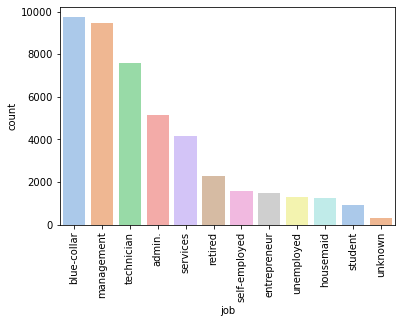

In [35]:
sns.countplot(data=banco, x='job', order=banco['job'].value_counts().index, palette='pastel')
plt.xticks(rotation = 90);

Para mais paletas de cores: https://seaborn.pydata.org/tutorial/color_palettes.html

#### Numérica

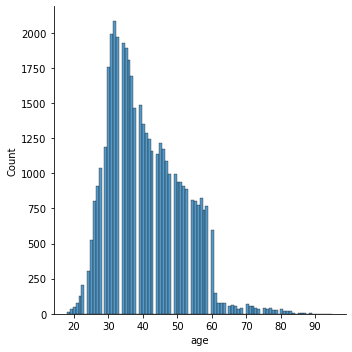

In [9]:
#sns.distplot(banco['balance'], kde=False, hist_kws={"range": [0,10000]})
sns.displot(banco['age'], kde=False)

### Duas variáveis

#### Numérica x Numérica

<AxesSubplot:xlabel='age', ylabel='balance'>

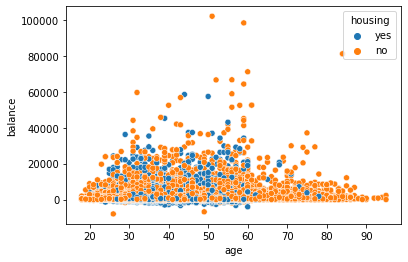

In [10]:
sns.scatterplot(data=banco, x='age', y='balance', hue='housing')

#### Numérica x Categórica

<AxesSubplot:xlabel='loan', ylabel='balance'>

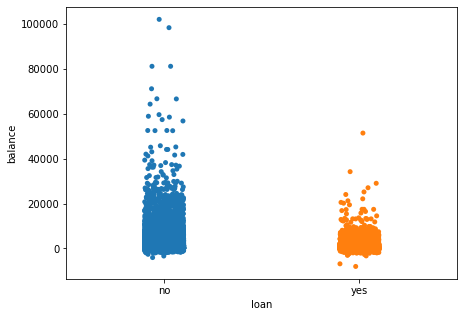

In [11]:
plt.subplots(figsize=(7,5))
sns.stripplot(data=banco, x='loan', y='balance')

<AxesSubplot:xlabel='loan', ylabel='age'>

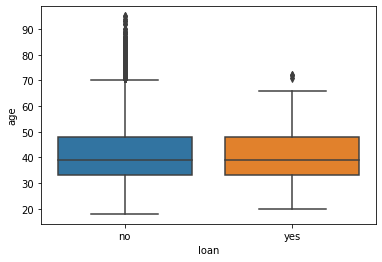

In [12]:
sns.boxplot(data=banco, x='loan', y='age')

(-4000.0, 4000.0)

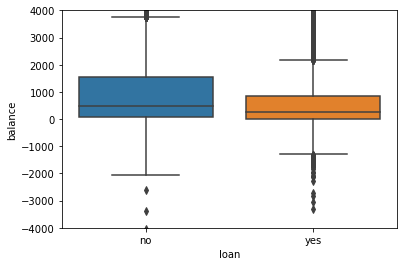

In [13]:
sns.boxplot(data=banco, x='loan', y='balance', )
plt.ylim(-4000, 4000)

#### Categórico x Categórico

In [14]:
pd.crosstab(banco['education'], banco['loan'])

loan,no,yes
education,,
primary,5827,1024
secondary,18899,4303
tertiary,11517,1784
unknown,1724,133


<AxesSubplot:xlabel='education'>

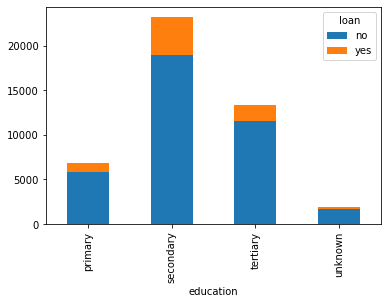

In [15]:
pd.crosstab(banco['education'], banco['loan']).plot(kind='bar', stacked=True)

## Teste de hipótese


**A média de idade que você conhece de mercado é 42. O Banco T tem a mesma média?**


T test: https://pt.wikipedia.org/wiki/Teste_t_de_Student

In [16]:
media_mercado = 42

In [17]:
banco.age.mean()

40.93621021432837

In [18]:
amostra = banco.sample(500, random_state=101)

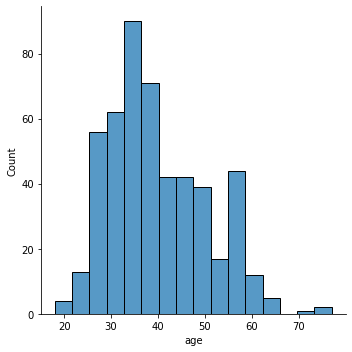

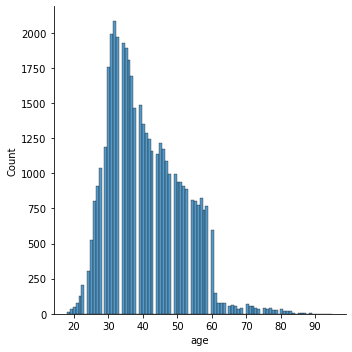

In [19]:
sns.displot(amostra.age)
sns.displot(banco.age)

In [20]:
stats.ttest_1samp(amostra.age, media_mercado)

Ttest_1sampResult(statistic=-4.598435538081216, pvalue=5.402052344009982e-06)

One Sample: t-test https://www.statisticshowto.com/one-sample-t-test/

**As médias de idade das pessoas com e sem empréstimo são as mesmas?**

In [21]:
loans=amostra[amostra.loan=="yes"].age
no_loans=amostra[amostra.loan=="no"].age

In [22]:
stats.ttest_ind(loans,no_loans)

Ttest_indResult(statistic=0.18475838957843935, pvalue=0.8534937618061303)

t-test independent: https://www.statisticshowto.com/independent-samples-t-test/

**Pré-requisitos do test t**

In [23]:
#homogeneidade
stats.levene(loans, no_loans)

LeveneResult(statistic=0.7867331241016298, pvalue=0.3755179304230145)

Teste de Levene: https://en.wikipedia.org/wiki/Levene%27s_test
Caso dê significante, passar como argumento `equal_var=False` no ttest_ind

In [25]:
stats.kstest(np.log(amostra.age),'norm')

KstestResult(statistic=0.9980760675452758, pvalue=0.0)

Kolmogorov–Smirnov test https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test

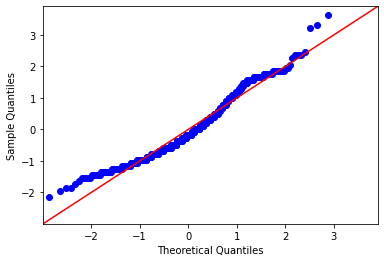

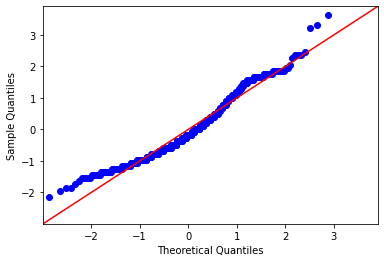

In [26]:
sm.qqplot(amostra.age, stats.norm, fit=True, line='45')

Gráfico Q-Q | QQ-Plot https://pt.wikipedia.org/wiki/Gr%C3%A1fico_Q-Q

**Teste não paramétrico**

In [27]:
stats.mannwhitneyu(loans, no_loans)

MannwhitneyuResult(statistic=14643.0, pvalue=0.30154906410588794)

Teste U de Mann-Whitney: https://pt.wikipedia.org/wiki/Teste_U_de_Mann-Whitney

**A idade muda significativamente de acordo com a educação?**

In [28]:
# ANOVA Analysis of Variance

stats.f_oneway(amostra.loc[amostra['education']=='tertiary',['age']],
              amostra.loc[amostra['education']=='secondary',['age']],
              amostra.loc[amostra['education']=='primary',['age']],
              amostra.loc[amostra['education']=='unknown',['age']])

F_onewayResult(statistic=array([10.67386956]), pvalue=array([8.25081131e-07]))

ANOVA: https://blog.minitab.com/pt/entendendo-analise-de-variancia-anova-e-o-teste-f

In [29]:
from statsmodels.stats.multicomp import MultiComparison

/Users/eduhideki/opt/anaconda3/lib/python3.8/site-packages/statsmodels/sandbox/stats/multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


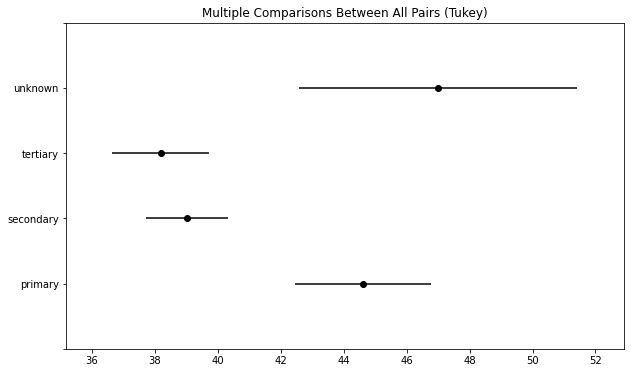

In [30]:
anova = MultiComparison(amostra.age,amostra.education)
results = anova.tukeyhsd()
results.plot_simultaneous();

Post-hoc para ANOVA: http://www.portalaction.com.br/anova/31-teste-de-tukey

****Existe uma associação com nível de educação e pessoas que tem empréstimo?****

In [31]:
education_loan = pd.crosstab(amostra['education'], amostra['loan'])

In [32]:
education_loan

loan,no,yes
education,,
primary,63,5
secondary,227,42
tertiary,118,24
unknown,21,0


In [33]:
stats.chi2_contingency(education_loan)

(7.383744581539197,
 0.06062200883229903,
 3,
 array([[ 58.344,   9.656],
        [230.802,  38.198],
        [121.836,  20.164],
        [ 18.018,   2.982]]))

Chi-quadrado: https://en.wikipedia.org/wiki/Chi-squared_test